# Linear Regression - Lasso and Ridge

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('as_train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Handling missing values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#Finding the null percentage"
null=pd.DataFrame(round(data.isnull().sum()*100/len(data.index),2).sort_values(ascending=False),columns=["Null %"])

In [7]:
null.head(10)

,Null %
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [8]:
# Removing the columns PoolQC, MiscFeature,Alley,Fence,FireplaceQu
data=data.drop(["PoolQC", "MiscFeature","Alley","Fence","FireplaceQu","Id"],axis=1)

In [9]:
# Filling the object value by mode
for i in data.columns:
    if(data[i].dtypes=='object'):
        data[i]=data[i].fillna(data[i].mode()[0])

In [10]:
#Filling the integer,float by mean
for i in data.columns:
    if(data[i].dtypes=='int'):
        data[i]=data[i].fillna(data[i].mean())

In [11]:
for i in data.columns:
    if(data[i].dtypes=='float'):
        data[i]=data[i].fillna(data[i].mean())

In [12]:
# Checking the  null values
data.isnull().sum().sum()

0

In [13]:
# Check the shape
data.shape

(1460, 75)

In [14]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
print(data['PoolArea'].value_counts())

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


In [16]:
print(data['MiscVal'].value_counts())

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64


In [17]:
print(data['3SsnPorch'].value_counts())

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [59]:
# Dropping the columns PoolArea, MiscVal,3SsnPorch as there is no much difference between the values
data=data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

KeyError: "['PoolArea', 'MiscVal', '3SsnPorch'] not found in axis"

In [ ]:
data.shape

#### Removing Outliers

In [20]:
#Numerical Columns
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = data[cols].quantile(0.05)
Q3 = data[cols].quantile(0.95)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

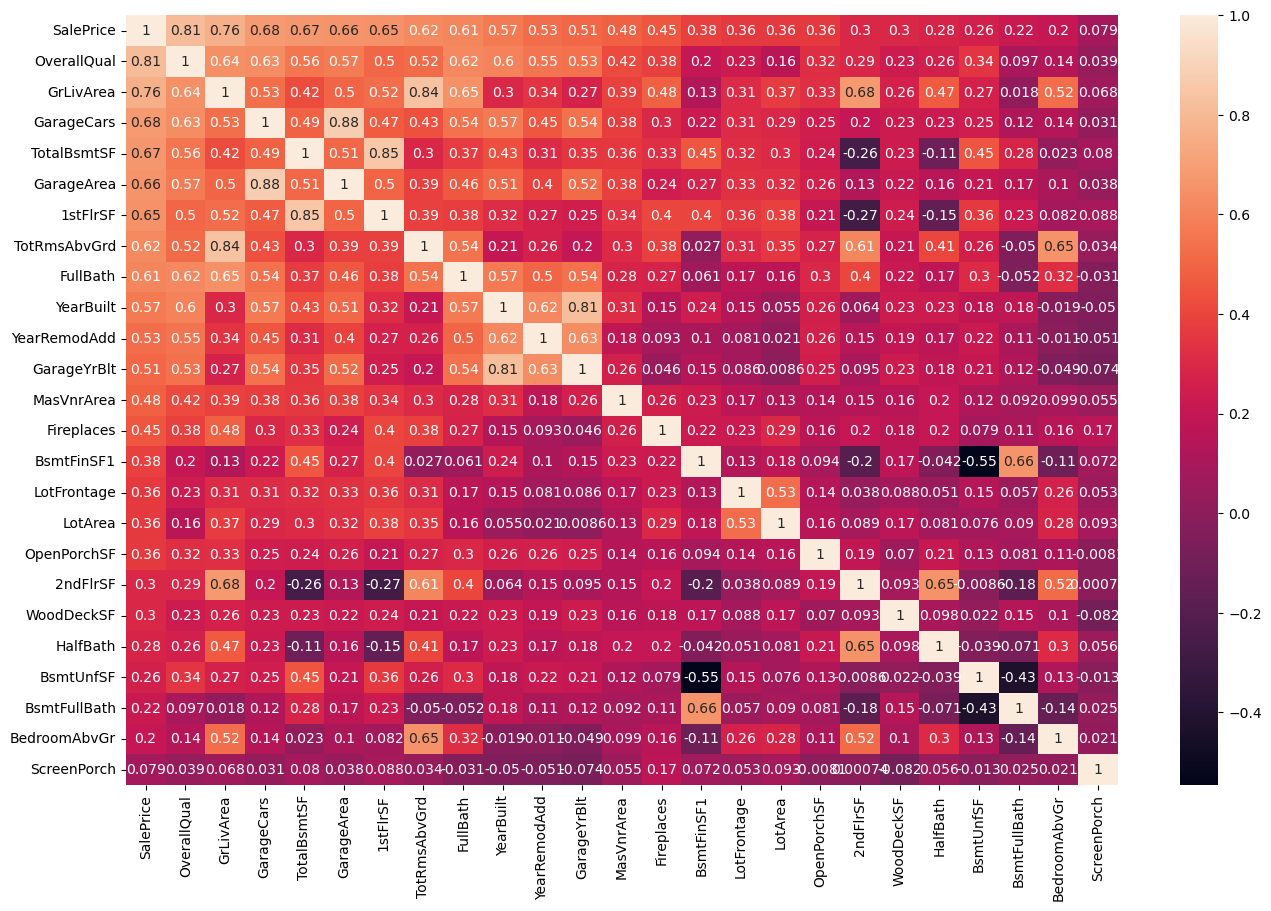

In [21]:
#sales price correlation matrix
plt.figure(figsize = (16, 10))
n = 25 # number of variables which have the highest correlation with 'Sales price'
corrmat = data.corr()
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(data[cols].corr(),annot=True)
plt.show()
# OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF are highly correlated to Saleprice

In [22]:
# Convert categorical value into Dummy variable
data=pd.get_dummies(data,drop_first=True)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
#Split the data into train and test
y = data.pop('SalePrice')
X=data

In [24]:
print(X.shape)
print(y.shape)

(1333, 221)
(1333,)


In [25]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [28]:
num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
           'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
           'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
1108,60,70.049958,8063,6,5,2000,2000,0.0,0,0,...,1,2000.0,2,463,100,48,0,0,11,2007
745,60,70.049958,8963,8,9,1976,1996,289.0,575,80,...,2,1994.0,2,831,0,204,0,0,7,2008
1134,60,57.000000,8773,6,5,1997,1997,0.0,0,0,...,1,1997.0,2,460,100,38,0,0,8,2007
512,20,70.000000,9100,5,5,1958,1958,0.0,521,174,...,0,1964.0,2,624,0,0,0,0,7,2006
43,20,70.049958,9200,5,6,1975,1980,0.0,280,491,...,0,1977.0,1,308,145,0,0,0,7,2008


In [29]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [30]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Linear Regression

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [33]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 35),
 ('LotFrontage', False, 78),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 146),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 14),
 ('BsmtUnfSF', False, 13),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 170),
 ('BsmtHalfBath', False, 87),
 ('FullBath', False, 138),
 ('HalfBath', False, 171),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 24),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 181),
 ('GarageYrBlt', False, 139),
 ('GarageCars', False, 32),
 ('GarageArea', False, 156),
 ('WoodDeckSF', False, 91),
 ('OpenPorchSF', False, 77),
 ('EnclosedPorch', False, 124),
 ('ScreenPorch', False, 39),
 ('MoSold', False, 194),
 ('YrSold', False, 163),
 ('MSZoning_FV', False, 41),
 ('MSZoning_RH', False, 45),
 ('MSZoning_RL', False, 46),

In [34]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev', 'Condition2_PosN',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood',
       'Heating_OthW', 'Functional_Maj2', 'SaleType_CWD', 'SaleType_Con'],
      dtype='object')

In [35]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(893, 25)
(440, 25)
(893,)
(440,)


In [36]:
lm1=lm.fit(X_train, y_train)

In [37]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-1.3956793176458382e+16
[-1.60182646e+04  1.32930263e+04  3.98364928e+04  5.30036741e+04
  4.39560650e+04  3.64498053e+04  6.32303769e+03  1.89747367e+04
 -8.72597698e+16 -3.61322447e+16 -9.31621674e+16  1.27858694e+17
 -6.51383654e+16 -3.81870112e+16  3.90023566e+16  7.03295234e+16
  1.66000000e+03 -5.87975000e+03  9.39412500e+03  1.65850000e+03
 -3.51685000e+04 -6.09497852e+16  2.88700000e+04  9.06750000e+02
 -5.64300000e+03  1.97560000e+04 -3.85700000e+03  1.08020000e+04
  1.09085000e+04  5.76975000e+03  2.29931250e+04  6.00000000e+01
 -3.11100000e+03  3.86860000e+04  3.16522500e+04  2.58160000e+04
  1.71640000e+04  4.72687500e+04  2.63000000e+02 -5.33251172e+03
  2.15550000e+03  1.25430000e+04 -1.23425000e+04  3.44900000e+03
 -4.61825000e+04  7.42825000e+03 -5.95537500e+03 -1.38562656e+04
 -2.48000000e+03  2.32000000e+02 -4.62185000e+04  1.45411250e+04
  7.52125000e+03 -7.03500000e+03 -1.92778125e+04 -1.13680000e+04
  7.55750000e+03 -2.08927500e+04 -1.35560000e+04 -1.37025000e+04
 

In [38]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [39]:
#2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train=",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test=",mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8863252235914564
0.8616425950336255
574662181156.8995
344283220950.8347
mse_train= 643518679.9069424
mse_test= 782461865.7973516


In [40]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge Regression

In [41]:
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [42]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-18490.728442033953


In [43]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 54839.37541489, 113769.03366585,  35613.94304985,  55524.21858718,
        52655.99225933,  73640.22716514,  72899.70220162,  35538.52465263,
        86815.2830689 , -45131.14702613,  53637.36952047,  40818.00759432,
       -20324.5314421 ,  -5752.37362243,   7077.65076733,  10346.16583767,
       -22300.48617538, -24048.59583083, -50697.25201207, -62593.49723403,
        -9390.489667  , -14824.30733621, -15478.38685908, -18928.2205192 ,
        17400.2104442 ])

In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_score training set",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_score test set",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2_score training set 0.8771397084947814
R2_score test set 0.8676328501189295
621097884021.4812
329377301635.661
695518347.168512
748584776.4446841


In [49]:
#Doubling the alpha value
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 49243.72757223, 105343.2340952 ,  31632.49571017,  54712.7134458 ,
        53855.39270423,  69723.70373293,  70442.82539677,  32717.51920012,
        83008.02413944, -33163.24907569,  54603.38515709,  29794.43789869,
       -14171.42673027,  -1352.78280765,   4423.13263648,   5908.49097199,
       -13065.33365999, -13391.36086394, -45762.61652355, -60749.0307189 ,
        -4869.32722529,  -8646.20733526,  -8838.93186578, -12660.74461641,
        12515.14655053])

In [51]:
# Calculating R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_score training set",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_score test set",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2_score training set 0.8771397084947814
R2_score test set 0.8676328501189295
621097884021.4812
329377301635.661
695518347.168512
748584776.4446841


In [133]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 10.0}
-18601.999547935644


In [135]:
alpha =10

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=10)

In [136]:
lasso.coef_

array([ 63329.5877798 , 122194.3291806 ,  38712.9557408 ,  54453.9608642 ,
        50360.82690304,  76932.02048741,   9612.93434339,      0.        ,
       166819.75062005, -64599.53403972,  51051.95696182,  63627.14246318,
       -35057.39351563, -22090.57912273,  15386.53070193,  29319.07657648,
       -63046.25492117, -71205.17394494, -57710.52599975, -66361.83068833,
       -25660.06027111, -38514.89067058, -41854.19740881, -32745.12742804,
        26742.32642935])

In [137]:
# Calculating R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8861166763239549
0.8642180422008209
575716453981.5583
337874577724.7912
644699276.5750934
767896767.5563437


In [138]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.863252e-01,8.820118e-01,8.861167e-01
1,R2 Score (Test),8.616426e-01,8.693729e-01,8.642180e-01
2,RSS (Train),5.746622e+11,5.964680e+11,5.757165e+11
3,RSS (Test),3.442832e+11,3.250475e+11,3.378746e+11
4,MSE (Train),2.536767e+04,2.584448e+04,2.539093e+04
5,MSE (Test),2.797252e+04,2.717985e+04,2.771095e+04


In [139]:
ridge_pred = ridge.predict(X_test1)

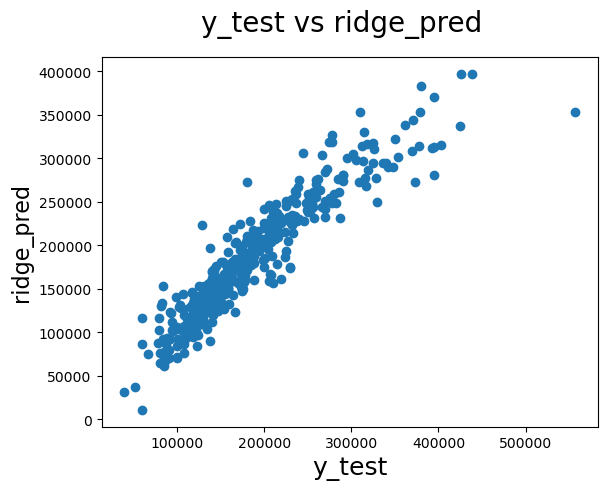

In [140]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

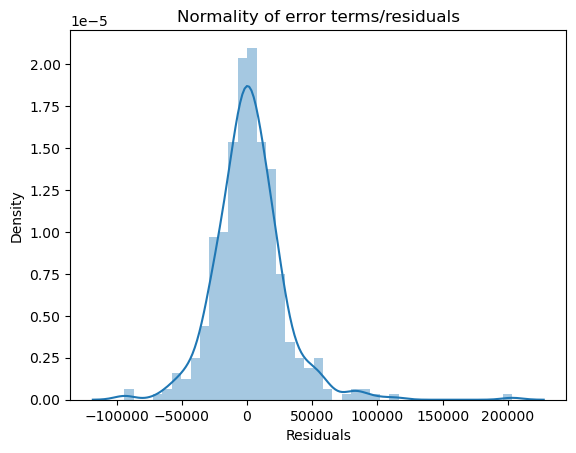

In [141]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [142]:
lasso_pred = lasso.predict(X_test1)

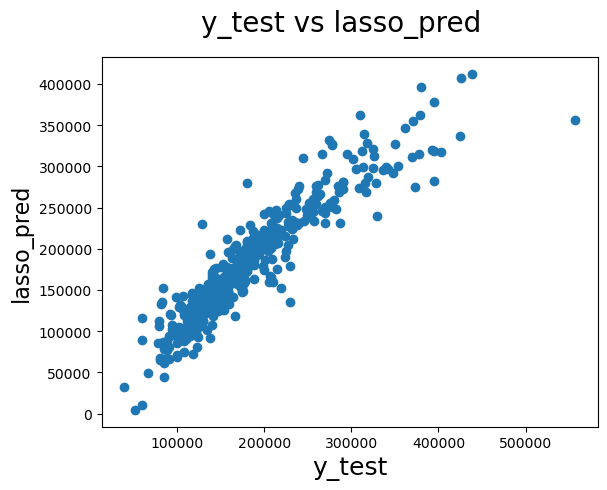

In [143]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

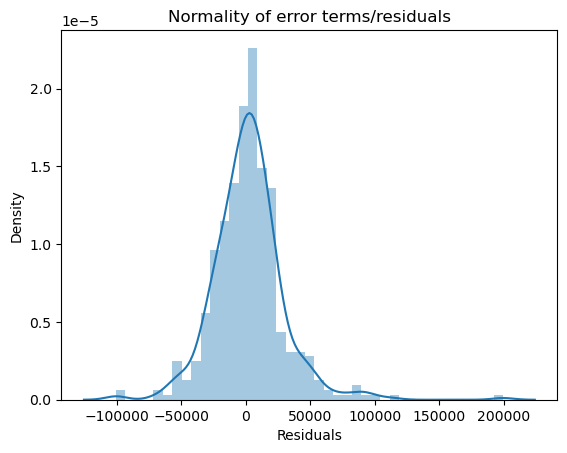

In [144]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()